In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan= pd.read_csv('C:/Users/hp/OneDrive/Desktop/Analytics/MSBA/BANA 273 - Machine Learning Analytics/Project/loan-train.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Preprocessing
- Replace Null Values
- Drop Loan_ID column
- Perform Label Encoding - In order to convert character variables, we have to enncode using Label Encoder

In [3]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [5]:
# in Categorical variables, replace the nulls with mode value
for col in categorical_columns:
    loan[col].fillna(loan[col].mode()[0],inplace=True)

# in Nnumeric variables, replcase nulls with mean values of each variable
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())

In [6]:
loan.drop('Loan_ID', axis = 1, inplace=True)

In [7]:
# Assigning numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
loan['Gender'] = labelencoder.fit_transform(loan['Gender'])
loan['Married'] = labelencoder.fit_transform(loan['Married'])
loan['Dependents'] = labelencoder.fit_transform(loan['Dependents'])
loan['Education'] = labelencoder.fit_transform(loan['Education'])
loan['Self_Employed'] = labelencoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = labelencoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = labelencoder.fit_transform(loan['Loan_Status'])

loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


## Random Forest with outliers and skewness

In [ ]:
from sklearn .model_selection import train_test_split
X=loan[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train,y_train):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X_train.loc[train_index],X_train.loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test)
    pred = model.predict_proba(xvl)[:,1]
print ('\nMean Validation Accuracy',mean/(i-1))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
Confusion_RandomForest = metrics.confusion_matrix(y_test, pred_test) 
print('Confusion Matrix:')
print(Confusion_RandomForest)
print('\n Accuracy of Random Forest Classification: {:.4f} \n'.format(metrics.accuracy_score(y_test, pred_test)))
print(classification_report(y_test, pred_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred) 
print('Confusion Matrix:')
print(Confusion_RandomForest)
print('\n Accuracy of Decision Tree Classification: {:.4f} \n'.format(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Running Random Forest model without outliers and remove skewness (noise) in columns (ApplicantIncome, CoApplicantIncome and Loan_Amount), we perform binning
Since there is noise the data and the data is skewed to the right, we perform below two corrective actions:
1. Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data
2. Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

## Method1: Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data

In [ ]:
#Remove outlier customers with outlying ApplicantIncome (above $30000 i.e. 7 customers)
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].count())
#plt.hist(loan['ApplicantIncome'][loan['ApplicantIncome']<30000], bins=10)

#Remove outlier customers with outlying CoaaplicantIncome (above $15000 i.e. 4 customers)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].count())
#plt.hist(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000], bins=10)

#Remove outlier customers with outlying loan amount (above $500 i.e. 5 customers)
print(loan['LoanAmount'][loan['LoanAmount']>500].count())
#plt.hist(loan['LoanAmount'][loan['LoanAmount']<500], bins=10)

In [ ]:
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].index)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].index)
print(loan['LoanAmount'][loan['LoanAmount']>500].index)

In [ ]:
#Create dataset without outliers - drop rows 
loan_noOutliers = loan.copy()
loan_noOutliers.drop(loan_noOutliers['ApplicantIncome'][loan_noOutliers['ApplicantIncome']>30000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['CoapplicantIncome'][loan_noOutliers['CoapplicantIncome']>15000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['LoanAmount'][loan_noOutliers['LoanAmount']>500].index, inplace=True)

In [ ]:
loan_noOutliers.head()

## Random Forest without outliers and skewness-droppinng outliers (method1)

In [ ]:
X=loan_noOutliers[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan_noOutliers[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train,y_train):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X_train.loc[train_index],X_train.loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
fig, ax = plt.subplots()
importances=pd.Series(model.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(12,8))
ax.set_title("Random Forest Feature Importance")
plt.ylabel("Features")
plt.xlabel("Features")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RandomForest_nOutliers_remove=clf.predict(X_test)

In [ ]:
from sklearn import metrics
Confusion_RandomForest = metrics.confusion_matrix(y_test, y_pred_RandomForest_nOutliers_remove) 
print(Confusion_RandomForest )
accuracy = metrics.accuracy_score(y_test, y_pred_RandomForest_nOutliers_remove) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred_RandomForest_nOutliers_remove) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred_RandomForest_nOutliers_remove) 
print("Recall score:",recall)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
Confusion_RandomForest = metrics.confusion_matrix(y_test, y_pred_RandomForest_nOutliers_remove) 
print('Confusion Matrix:')
print(Confusion_RandomForest)
print('\n Accuracy of Random Forest Classification: {:.4f} \n'.format(metrics.accuracy_score(y_test, y_pred_RandomForest_nOutliers_remove)))
print(classification_report(y_test, y_pred_RandomForest_nOutliers_remove))

## Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

In [ ]:
#Performing normalization using Random Forest on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

loan['TotalApplicantIncome']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['TotalApplicantIncome']

# applying log function on TotalApplicantIncome & LoanAmount_log
loan['TotalApplicantIncome_log']=np.log(loan['TotalApplicantIncome'])    
loan['LoanAmount_log']=np.log(loan['LoanAmount'])

In [ ]:
loan.head()

In [ ]:
loan['TotalApplicantIncome_log'].hist(bins=10) 

In [ ]:
loan['LoanAmount_log'].hist(bins=10)

## Random Forest without outliers and skewness-log function normalization (method 2)

In [ ]:
loan.columns

In [ ]:
#Logistic Regression- Without outliers- method2: using log function
X=loan[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','TotalApplicantIncome_log', 'LoanAmount_log','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train,y_train):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X_train.loc[train_index],X_train.loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
importances=pd.Series(model.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(12,8))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RandomForest_nOutliers_LogFunction=clf.predict(X_test)

In [ ]:
from sklearn import metrics
Confusion_RandomForest = metrics.confusion_matrix(y_test, y_pred_RandomForest_nOutliers_LogFunction) 
print(Confusion_RandomForest )
accuracy = metrics.accuracy_score(y_test, y_pred_RandomForest_nOutliers_LogFunction) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred_RandomForest_nOutliers_LogFunction) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred_RandomForest_nOutliers_LogFunction) 
print("Recall score:",recall)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
Confusion_RandomForest = metrics.confusion_matrix(y_test, y_pred_RandomForest_nOutliers_LogFunction) 
print('Confusion Matrix:')
print(Confusion_RandomForest)
print('\n Accuracy of Random Forest Classification: {:.4f} \n'.format(metrics.accuracy_score(y_test, y_pred_RandomForest_nOutliers_LogFunction)))
print(classification_report(y_test, y_pred_RandomForest_nOutliers_LogFunction))

## Grid Search - Tuning of hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
paramgrid = {‘max_depth’: list(range(1,20,2)), ‘n_estimators’: list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X_train,y_train, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

## Model Evaluation and Comparison

In [9]:
X=loan[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

In [23]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 8

Naive Bayes: 0.793163 (0.016689)
LR: 0.801319 (0.019478)
CART: 0.701933 (0.016321)
RF: 0.776929 (0.027104)


Text(0.5, 1.0, 'Model Evaluation')

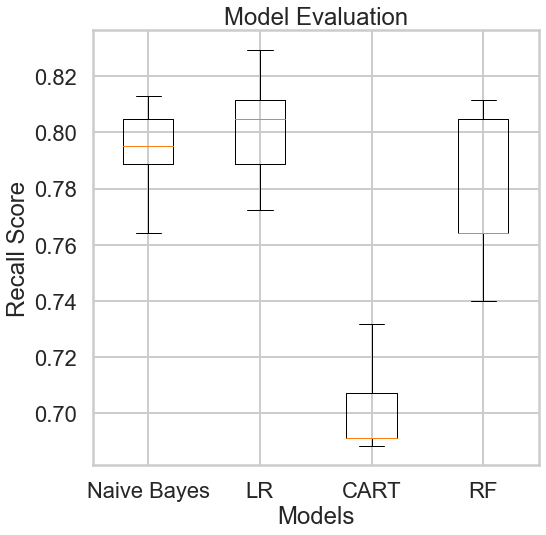

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

results = []
names = []
scoring = 'recall_weighted'

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results) #add results to list which will be displayed for each model
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) #format message
    print(msg)

plt.figure(figsize=(8,8))
plt.boxplot(results)
plt.xlabel('Models')
plt.ylabel('Recall Score')
labels = names
labels_num = [1,2,3,4]
plt.xticks(labels_num, labels)
plt.title('Model Evaluation')